In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns  #advanced visualization library
import requests, zipfile, io
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/My Drive/DataCEPT 2nd contest/train.csv')
test = pd.read_csv('/content/drive/My Drive/DataCEPT 2nd contest/test.csv')
sample_submission = pd.read_csv('/content/drive/My Drive/DataCEPT 2nd contest/SampleSubmission.csv')

In [ ]:
train.head()


,ID,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
missing_percentage=(train.isna().sum()/len(train)).sort_values(ascending=False)
missing_percentage
#Jawek fesfes ndhifa

charges     0.0
region      0.0
smoker      0.0
children    0.0
bmi         0.0
sex         0.0
age         0.0
ID          0.0
dtype: float64

In [ ]:
all_data = pd.concat((train, test)).reset_index(drop = True)
ids=test.ID
train= all_data[:len(Y)]

In [ ]:
train.head()

,ID,age,bmi,charges,children,region,sex,smoker
0,0,19,27.900,16884.92400,0,southwest,female,yes
1,1,18,33.770,1725.55230,1,southeast,male,no
2,2,28,33.000,4449.46200,3,southeast,male,no
3,3,33,22.705,21984.47061,0,northwest,male,no
4,4,32,28.880,3866.85520,0,northwest,male,no


In [ ]:
train=train.drop('ID',axis=1)

In [ ]:
train.region.value_counts()

southeast    238
northeast    205
southwest    198
northwest    197
Name: region, dtype: int64

In [ ]:
scaler = StandardScaler()
x=train.bmi.tolist()
x=np.array(x).reshape(-1,1)
scaler.fit(x)
x=scaler.transform(x)
train.bmi=x


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['male','female'])
train.sex=le.transform(train.sex)

In [ ]:
le.fit(['yes','no'])
train.smoker=le.transform(train.smoker)

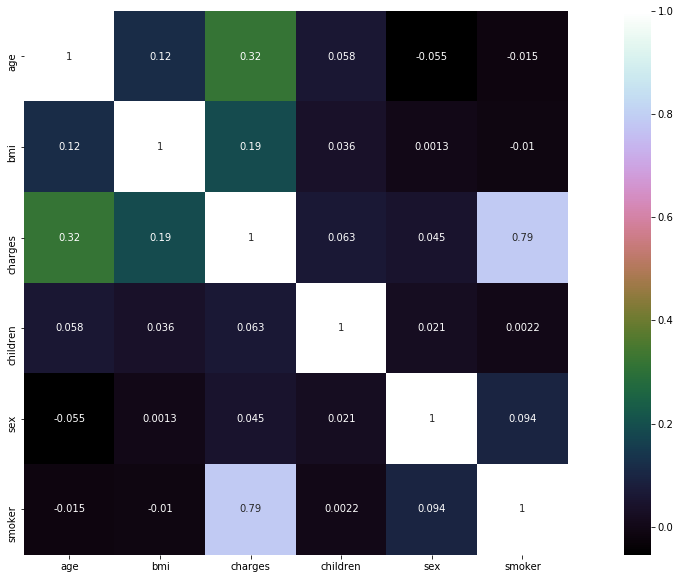

In [ ]:
corr_mat=train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

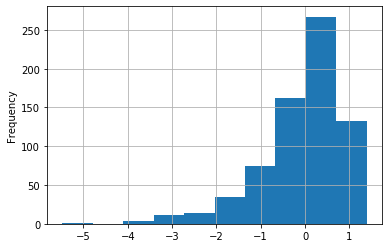

In [ ]:
#train.charges.plot(kind='hist',bins=10,grid=True)
x=np.log1p(train.bmi)
x.plot(kind='hist',bins=10,grid=True)


In [ ]:
#train.charges=np.log1p(train.charges)

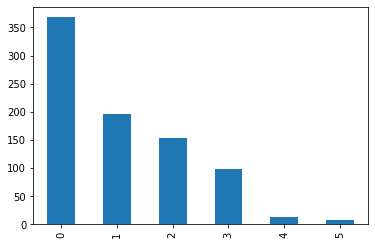

In [ ]:
train.children.value_counts().plot(kind='bar')

In [ ]:
train=train[['age', 'sex', 'smoker', 'bmi', 'children', 'region', 'charges']]

In [ ]:
train.head()

,age,sex,smoker,bmi,children,region,charges
0,19,0,1,-0.509291,0,southwest,16884.92400
1,18,1,0,0.470401,1,southeast,1725.55230
2,28,1,0,0.341889,3,southeast,4449.46200
3,33,1,0,-1.376327,0,northwest,21984.47061
4,32,1,0,-0.345731,0,northwest,3866.85520


In [ ]:
train=pd.get_dummies(train)

In [ ]:
Y=train['charges']
train=train.drop('charges',axis=1)

In [ ]:
train.shape


(838, 9)

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(train,Y , test_size=0.20, random_state=4)

In [ ]:
le.fit(['male','female'])
test.sex=le.transform(test.sex)
le.fit(['yes','no'])
test.smoker=le.transform(test.smoker)

In [ ]:
test=pd.get_dummies(test)

In [ ]:
test=test.drop("ID",axis=1)

In [ ]:
scaler = StandardScaler()
x=test.bmi.tolist()
x=np.array(x).reshape(-1,1)
scaler.fit(x)
x=scaler.transform(x)
test.bmi=x


In [ ]:
train.columns

Index(['age', 'sex', 'smoker', 'bmi', 'children', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
test=test[['age', 'sex', 'smoker', 'bmi', 'children',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']]

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
                 gamma=0,                 
                 learning_rate=0.005,
                 max_depth=20,
                 min_child_weight=1.5,
                 n_estimators=3000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb_model.fit(train_X,train_y)
val_pred_xgb = xgb_model.predict(val_X)
val_mae_xgb = np.sqrt(mean_squared_error(val_pred_xgb, val_y))
print(val_mae_xgb)

[20:43:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5281.642054770907


In [ ]:
# make predictions which we will submit. 
test_preds_xgb = xgb_model.predict(test)

# The lines below shows how to save predictions in format used for competition scoring
# Just uncomment them.
output = pd.DataFrame({'ID': ids, 'charges': (test_preds_xgb)})
output.to_csv('/content/drive/My Drive/DataCEPT 2nd contest/sub_xgb.csv', index=False)

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.005,
                 max_depth=10,
                 min_child_weight=1.5,
                 n_estimators=5000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
lgb_model.fit(train_X,train_y)
val_pred_lgb = lgb_model.predict(val_X)
val_mae_lgb = np.sqrt(mean_squared_error(val_pred_lgb, val_y))
print(val_mae_lgb)

4766.781983942229


In [ ]:
# make predictions which we will submit. 
test_preds_lgb = lgb_model.predict(test)

# The lines below shows how to save predictions in format used for competition scoring
# Just uncomment them.
output = pd.DataFrame({'ID': ids, 'charges': (test_preds_lgb)})
output.to_csv('/content/drive/My Drive/DataCEPT 2nd contest/sub_lgb.csv', index=False)